# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import style
style.use('ggplot')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#----- Extraction date

date_extraction = "03/28/2020"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cit = []


In [5]:
print("Beginning Data Rretieval")
print("---------------------------------")

for x, city in enumerate(cities, start=1):      
    try:
        print(f"Processing information for city {x}| {city}")
        response = requests.get(f"{query_url}{city}").json()
        cit.append(response["name"])
        country.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]['all'])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
    except KeyError:
        print(f"City not found. Skipping...")

print("---------------------------------")
print("Data Rretieval Complete")
print("---------------------------------")

Beginning Data Rretieval
---------------------------------
Processing information for city 1| vaini
Processing information for city 2| kavieng
Processing information for city 3| albany
Processing information for city 4| torbay
Processing information for city 5| hofn
Processing information for city 6| bluff
Processing information for city 7| taolanaro
City not found. Skipping...
Processing information for city 8| port elizabeth
Processing information for city 9| avarua
Processing information for city 10| castro
Processing information for city 11| barrow
Processing information for city 12| port alfred
Processing information for city 13| ushuaia
Processing information for city 14| butaritari
Processing information for city 15| mataura
Processing information for city 16| quatre cocos
Processing information for city 17| lavrentiya
Processing information for city 18| guerrero negro
Processing information for city 19| klaksvik
Processing information for city 20| punta arenas
Processing inform

Processing information for city 169| berezna
Processing information for city 170| sambava
Processing information for city 171| tabiauea
City not found. Skipping...
Processing information for city 172| sentyabrskiy
City not found. Skipping...
Processing information for city 173| meadow lake
Processing information for city 174| emet
Processing information for city 175| lindi
Processing information for city 176| mackay
Processing information for city 177| henties bay
Processing information for city 178| shizunai
Processing information for city 179| vanino
Processing information for city 180| kiamba
Processing information for city 181| maymyo
Processing information for city 182| arnedo
Processing information for city 183| woerden
Processing information for city 184| port hedland
Processing information for city 185| bindi
Processing information for city 186| katobu
Processing information for city 187| porto walter
Processing information for city 188| skjervoy
Processing information for city

Processing information for city 341| matay
Processing information for city 342| tangkak
Processing information for city 343| lompoc
Processing information for city 344| bandarbeyla
Processing information for city 345| srednekolymsk
Processing information for city 346| bambanglipuro
Processing information for city 347| wainwright
Processing information for city 348| algeciras
Processing information for city 349| piacabucu
Processing information for city 350| sinnamary
Processing information for city 351| opuwo
Processing information for city 352| guarapari
Processing information for city 353| tezu
Processing information for city 354| sakakah
Processing information for city 355| dicabisagan
Processing information for city 356| poum
Processing information for city 357| katsuura
Processing information for city 358| oudtshoorn
Processing information for city 359| coari
Processing information for city 360| berlevag
Processing information for city 361| huadian
Processing information for city 

Processing information for city 513| makakilo city
Processing information for city 514| sisimiut
Processing information for city 515| caravelas
Processing information for city 516| avera
Processing information for city 517| emba
Processing information for city 518| marsa matruh
Processing information for city 519| lopandino
Processing information for city 520| jahrom
City not found. Skipping...
Processing information for city 521| waw
Processing information for city 522| ous
Processing information for city 523| saint-pierre
Processing information for city 524| poso
Processing information for city 525| jyvaskyla
Processing information for city 526| severo-kurilsk
Processing information for city 527| sarandi
Processing information for city 528| cayenne
Processing information for city 529| newport
Processing information for city 530| lazurne
Processing information for city 531| marzuq
Processing information for city 532| waitakere
Processing information for city 533| sunrise manor
Process

In [6]:
#------ Create a dctionary with the retrieved information
data = {
    "City": cit,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date": date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
    
}

In [7]:
info_cities = pd.DataFrame(data=data)
info_cities


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1589473762,88,-21.20,-175.20,21.00,1.50
1,Kavieng,70,PG,1589473762,81,-2.57,150.80,28.01,6.06
2,Albany,20,US,1589473758,23,42.60,-73.97,16.67,4.10
3,Torbay,40,CA,1589473763,45,47.67,-52.73,7.78,14.40
4,Hofn,75,IS,1589473763,83,64.25,-15.21,7.00,3.60
...,...,...,...,...,...,...,...,...,...
549,Aripuanã,76,BR,1589474079,91,-9.17,-60.63,27.64,1.46
550,Lima,75,PE,1589474057,82,-12.04,-77.03,20.00,4.10
551,Sosnovo,48,RU,1589474080,48,60.55,30.21,8.89,3.33
552,Sorong,44,ID,1589474080,84,-0.88,131.25,26.81,2.44


In [12]:
#export the data

info_cities.to_csv(output_data_file)

In [13]:
info_cities.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

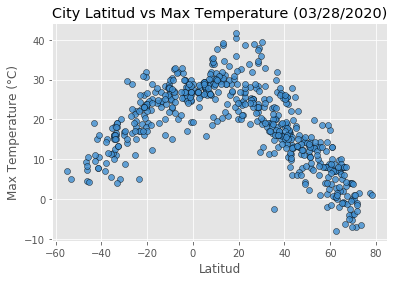

In [37]:
y = info_cities['Max Temp']
x1= info_cities['Lat']

color = "#3F8ED0"
edgecolor="black"
plt.scatter(x1,y, alpha = .8, color=color,edgecolor=edgecolor)
plt.title(f"City Latitud vs Max Temperature ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.savefig('./output_data/fig1.png')
plt.show()


#### Latitude vs. Humidity Plot

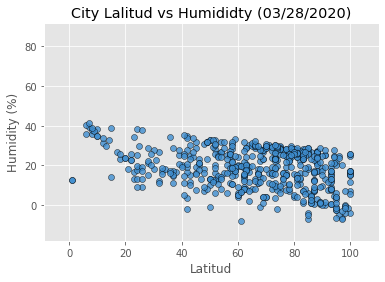

In [38]:
x2 = info_cities['Humidity']
plt.scatter(x2,y,alpha=0.8, color=color,edgecolor=edgecolor)

plt.title(f"City Lalitud vs Humididty ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")

plt.xmin, plt.xmax, plt.ymin, plt.ymax = plt.axis()
plt.xmin, plt.xmax, plt.ymin, pltymax = plt.axis([x2.min()-10,x2.max()+10, y.min()-10, y.max()+50])

plt.grid(True)
plt.savefig('./output_data/fig2.png')
plt.show()


#### Latitude vs. Cloudiness Plot

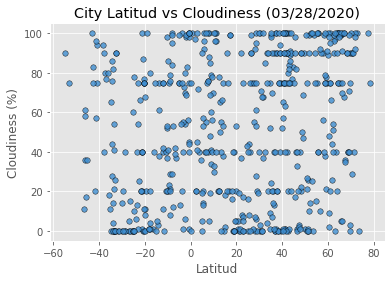

In [39]:

info_cities.plot.scatter("Lat","Cloudiness",color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.title(f"City Latitud vs Cloudiness ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig('./output_data/fig3.png')
plt.show()

#### Latitude vs. Wind Speed Plot

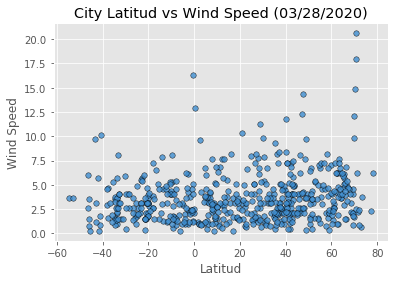

In [40]:
info_cities.plot.scatter("Lat","Wind Speed", color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.grid(True)
plt.xlabel("Latitud")
plt.ylabel("Wind Speed")
plt.title(f"City Latitud vs Wind Speed ({date_extraction})")
plt.savefig('./output_data/fig4.png')
plt.show()

## Linear Regression

### Latitud vs Temperature

The r-squared is: -0.4442464564201927


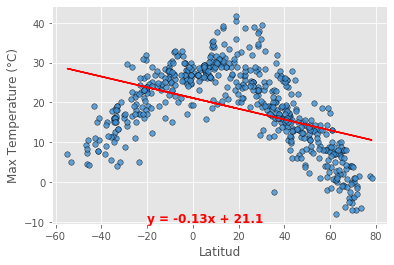

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots

y_values=info_cities["Max Temp"]
x_values=info_cities["Lat"]
# Get regression values
(slope,intercept,rvalue1,pvalue,stderr)=linregress(x_values,y_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-20,-10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")
plt.grid(True)

#------ Print r square value
print(f'The r-squared is: {rvalue1}')

#------ Showing plot
plt.savefig('./output_data/fig5.png')
plt.show()




In this graphic, it is shown that the highest temperatures are located, at the cero latitude, that corresponds to the Equator, and the higher temperatures are distributed approximately 30 degreed above and below that point. The more that you get away from the extremes the higher temperatures.

### Latitude vs Humidity

The r-squared is: -0.03342533409305244


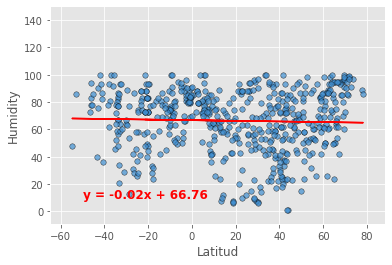

In [42]:
y1_values=info_cities["Humidity"]

# Get regression values
(slope,intercept,rvalue2,pvalue,stderr)=linregress(x_values,y1_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y1_values,color=color,edgecolor=edgecolor,alpha=.7,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,10),fontsize=12, color = "r",weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")
plt.grid(True)
plt.xmin, plt.xmax, plt.ymin, plt.ymax = plt.axis()
plt.xmin, plt.xmax, plt.ymin, pltymax = plt.axis([x_values.min()-10, x_values.max()+10,
                                                  y1_values.min()-10, y1_values.max()+50])

#------ Print r square value
print(f'The r-squared is: {rvalue2}')
plt.savefig('./output_data/fig6.png')
#------ Showing plot
plt.show()


One of the most known premises is: 
> _"Most of the vapor that is in the air evaporated from the surface of the oceans. [...] Also, because warm air can hold more moisture than cool air, locations with warm climates, such as those near the equator, generally have higher humidity than locations with cooler climates, such as those near the poles."_

However, taking into consideration the spread of the data and de r-squared value it seems that there is no significant correlation between the humidity and the latitude. Therefore, based in this premise that the nearest the highest humidity, there are places located at a latitude 60 that are more humid than the ones near the Equator.

### Latitud vs Cloudiness

The r-squared is: 0.22452989990730512


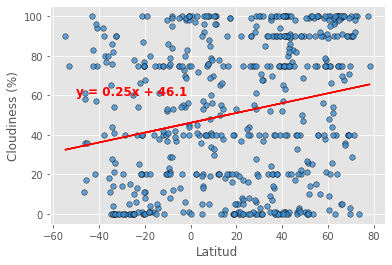

In [43]:
y2_values=info_cities["Cloudiness"]

# Get regression values
(slope,intercept,rvalue3,pvalue,stderr)=linregress(x_values,y2_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y2_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,60),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue3}')
plt.savefig('./output_data/fig7.png')
#------ Showing plot
plt.show()


According with the NASA:
> _"Clouds  vary with distance from the equator. The cloudiest regions are the tropics and the temperate zones; the subtropics and the polar regions have between 10 and 20 percent less cover. Tropical cloud tops are substantially higher, extending between one and two kilometers higher than cloud tops in the midlatitudes and more than two kilometers higher than the clouds over the subtropics and the poles."_

The above premise it is shown in the plot, there is a less concentration of cloudiness at the extremes (-60,80).

However, one of the most notoriuos facts is that it seems that basen solely in the latitud as a determinant in the cloudiness it it seems that the don't have a close correlation. 

It may be conclude, that the clouds in the globe can vary with location, with time of day, with changing weather and with season.

### Latitud vs Wind Speed

The r-squared is: 0.22452989990730512


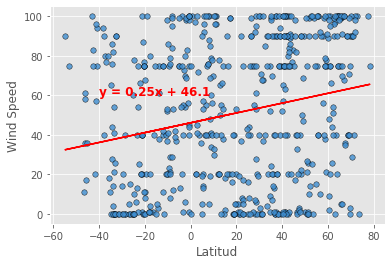

In [44]:
y3_values=info_cities["Cloudiness"]

# Get regression values
(slope,intercept,rvalue4,pvalue,stderr)=linregress(x_values,y3_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y3_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-40,60),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Speed")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue4}')
plt.savefig('./output_data/fig8.png')

#------ Showing plot
plt.show()

In this plot, it is described the relationship between the latitude and the Wind Speed have not a close relationships, given  the fact that is widley spread. 

According with some articles, at the Equator, the sun warms the water and land more than it does the rest of the globe. Warm equatorial air rises higher into the atmosphere and migrates toward the poles. This is a low-pressure system. At the same time, cooler, denser air moves over Earth’s surface toward the Equator to replace the heated air. This is a high-pressure system. Winds generally blow from high-pressure areas to low-pressure areas. 

So, the data  it might be affected by the time at was collected.

### Northern vs Southern

In [26]:
# Create Northern and Southern Hemisphere DataFrames
#------- Northern Hemisphere (greater than or equal to 0 degrees latitude) 

northern = info_cities.loc[info_cities["Lat"] >=0]



#------- Southern Hemisphere (less than 0 degrees latitude)
southern = info_cities.loc[info_cities["Lat"]<0]
southern.head()
# Perform a linear regression on temperature vs. latitude


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1589473762,88,-21.20,-175.20,21.00,1.50
1,Kavieng,70,PG,1589473762,81,-2.57,150.80,28.01,6.06
5,Bluff,11,NZ,1589473785,73,-46.60,168.33,9.23,6.05
6,Port Elizabeth,0,ZA,1589473780,82,-33.92,25.57,16.00,2.10
7,Avarua,100,CK,1589473806,88,-21.21,-159.78,26.00,3.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8584610570503036


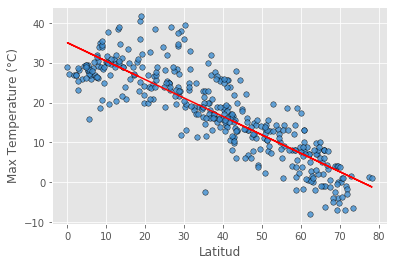

In [45]:
y_north=northern["Max Temp"]
x_north = northern["Lat"]
# Get regression values
(slope,intercept,rvalue4,pvalue,stderr)=linregress(x_north,y_north)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_north,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(20,-20),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue4}')
plt.savefig('./output_data/fig9.png')
#------ Showing plot
plt.show()

This plot shows that there is a negative correlation between temperature and latitude; this, because the more that you get away from the Equator (0 lat) the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7876337981701985


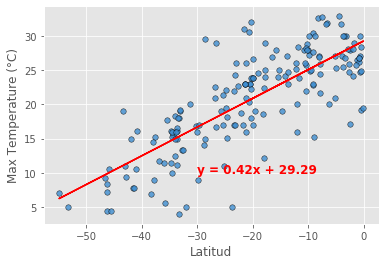

In [46]:
y_south = southern["Max Temp"]
x_south = southern["Lat"]
# Get regression values
(slope,intercept,rvalue5,pvalue,stderr)=linregress(x_south,y_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-30,10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue5}')
plt.savefig('./output_data/fig10.png')
#------ Showing plot
plt.show()

Quite the opposite with the last plot, this show a positive relationships, the more that you wet close to te equator, the warmer temperatures are found.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15949663996234162


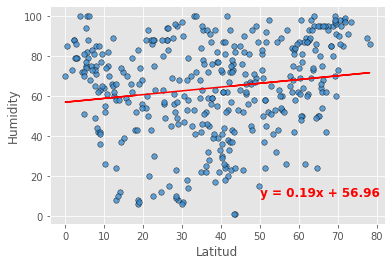

In [47]:
y_hum_north = northern["Humidity"]
# Get regression values
(slope,intercept,rvalueHN,pvalue,stderr)=linregress(x_north,y_hum_north)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_hum_north,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(50,10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueHN}')
plt.savefig('./output_data/fig11.png')
#------ Showing plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11896850082722538


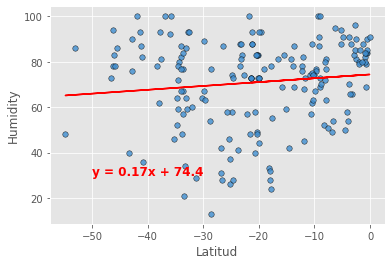

In [48]:
y_hum_south = southern["Humidity"]
# Get regression values
(slope,intercept,rvalueHS,pvalue,stderr)=linregress(x_south,y_hum_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_hum_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-50,30),fontsize=12, color = "r", weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueHS}')
plt.savefig('./output_data/fig12.png')

#------ Showing plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19540774491648255


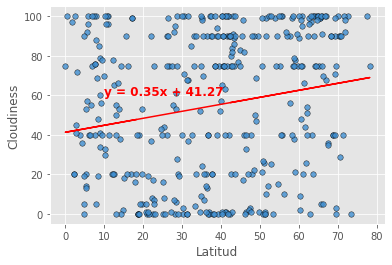

In [49]:
y_cloud_south = northern["Cloudiness"]

# Get regression values
(slope,intercept,rvalueCN,pvalue,stderr)=linregress(x_north,y_cloud_south)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_cloud_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(10,60),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueCN}')
plt.savefig('./output_data/fig13.png')
#------ Showing plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12053926921616985


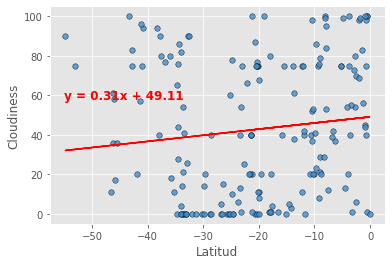

In [50]:
y_cloud_south = southern["Cloudiness"]
# Get regression values
(slope,intercept,rvalueCS,pvalue,stderr)=linregress(x_south,y_cloud_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_cloud_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-55,58),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueCS}')
plt.savefig('./output_data/fig14.png')

#------ Showing plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17016721126177467


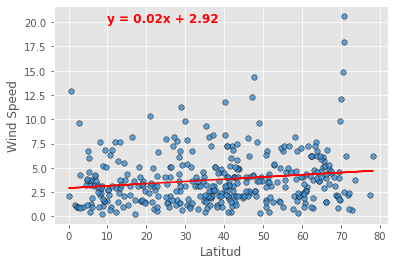

In [51]:
y_ws_south = northern["Wind Speed"]

# Get regression values
(slope,intercept,rvalueWN,pvalue,stderr)=linregress(x_north,y_ws_south)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_ws_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(10,20),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Speed")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueWN}')
plt.savefig('./output_data/fig15.png')
#------ Showing plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016746083193554966


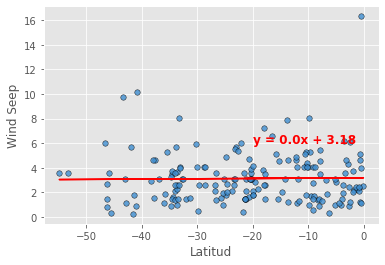

In [52]:
y_ws_south = southern["Wind Speed"]
# Get regression values
(slope,intercept,rvalueWS,pvalue,stderr)=linregress(x_south,y_ws_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_ws_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-20,6),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Seep")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueWS}')
plt.savefig('./output_data/fig16.png')
#------ Showing plot
plt.show()

### Conclusions

- The wather it is affected by the latitud, however, it is also affected by the time of the day that the data is observed and the season.

- The complex relationships between fronts (high an low pressure) cause different types of wind and weather patterns.

- It may be conclude that the well known premises that the highest temperatures are located near de equator.

